<a href="https://colab.research.google.com/github/zsexton/homelab/blob/main/train-yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv9 on a Custom Dataset
---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start / Setup

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon May 27 16:11:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   35C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os, glob
from IPython.display import Image
from google.colab import drive, userdata


HOME = os.getcwd()
YOLO = os.path.join(HOME, 'yolov9')
print(HOME)
print(YOLO)

/content
/content/yolov9


Connect the Notebook with your Google Drive to store the results

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Number the trainign runs consecutively

In [ ]:
Lauf_num = 'Lauf_7'

## Clone and Install

**NOTE**: These are the github commands for cloning, adding, commiting and pushing

In [ ]:
github_token = userdata.get('github_token')

# clone GitHub Repo
!git clone https://{github_token}@github.com/KoniHD/yolov9.git
!pip install -r {YOLO}/requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 579, done.
remote: Counting objects: 100% (579/579), done.
remote: Compressing objects: 100% (284/284), done.
remote: Total 579 (delta 319), reused 525 (delta 281), pack-reused 0
Receiving objects: 100% (579/579), 8.75 MiB | 16.37 MiB/s, done.
Resolving deltas: 100% (319/319), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 10.9 MB/s eta 0:00:00


## Download necessary data

### Download weights

**NOTE:** There are multiple more versions of pretrained weights provided by the authors of the paper. You will have to look into their differences! [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-m.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-s.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-m.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-s2.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 27 16:13 .
drwxr-xr-x 1 root root      4096 May 27 16:13 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


### Download LOCO dataset

**NOTE:** This might need to be adjusted to deal with COCO style anotations

In [ ]:
%cd {YOLO}
!{YOLO}/scripts/get_loco.sh # This script downloads the dataset in the active directory
%cd {HOME}
!python {YOLO}/scripts/transform_annotations.py --d {YOLO}/loco --convert-images --convert-to-yolo

## Train custom model on LOCO dataset

**Note:** `train.py` is only for gelan models `train_dual.py` is only for yolov9 models

In [ ]:
!python {YOLO}/train_dual.py --batch 8 --epochs 50 --device 0 --min-items 0 --img 640 \
--data {YOLO}/loco.yaml \
--weights {HOME}/weights/yolov9-e.pt \
--cfg {YOLO}/models/detect/yolov9_custom.yaml \
--hyp hyp.scratch-high.yaml

2024-05-27 16:16:06.360431: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 16:16:06.413883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 16:16:06.413939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 16:16:06.415948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 16:16:06.424654: I tensorflow/core/platform/cpu_feature_guar

## Detection with self-trained detection model

**Note:** There is no test set. Image `509189,8734.jpg` is just one example from the training dataset. It includes a lot of pallets and a pallet truck which should be detected.

In [ ]:
!python {YOLO}/detect_dual.py --weights {YOLO}/runs/train/exp/weights/best.pt --conf 0.1 --source {YOLO}/loco/images/val/509189,8734.jpg --device 0

detect_dual: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/loco/images/val/509189,8734.jpg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-111-g11dd2bc Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9_custom summary: 580 layers, 60505150 parameters, 0 gradients, 263.9 GFLOPs
image 1/1 /content/yolov9/loco/images/val/509189,8734.jpg: 384x640 1 forklift, 59 pallets, 5 stillages, 1 pallet_truck, 237.7ms
Speed: 0.5ms pre-process, 237.7ms inference, 539.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9/runs/detect/exp


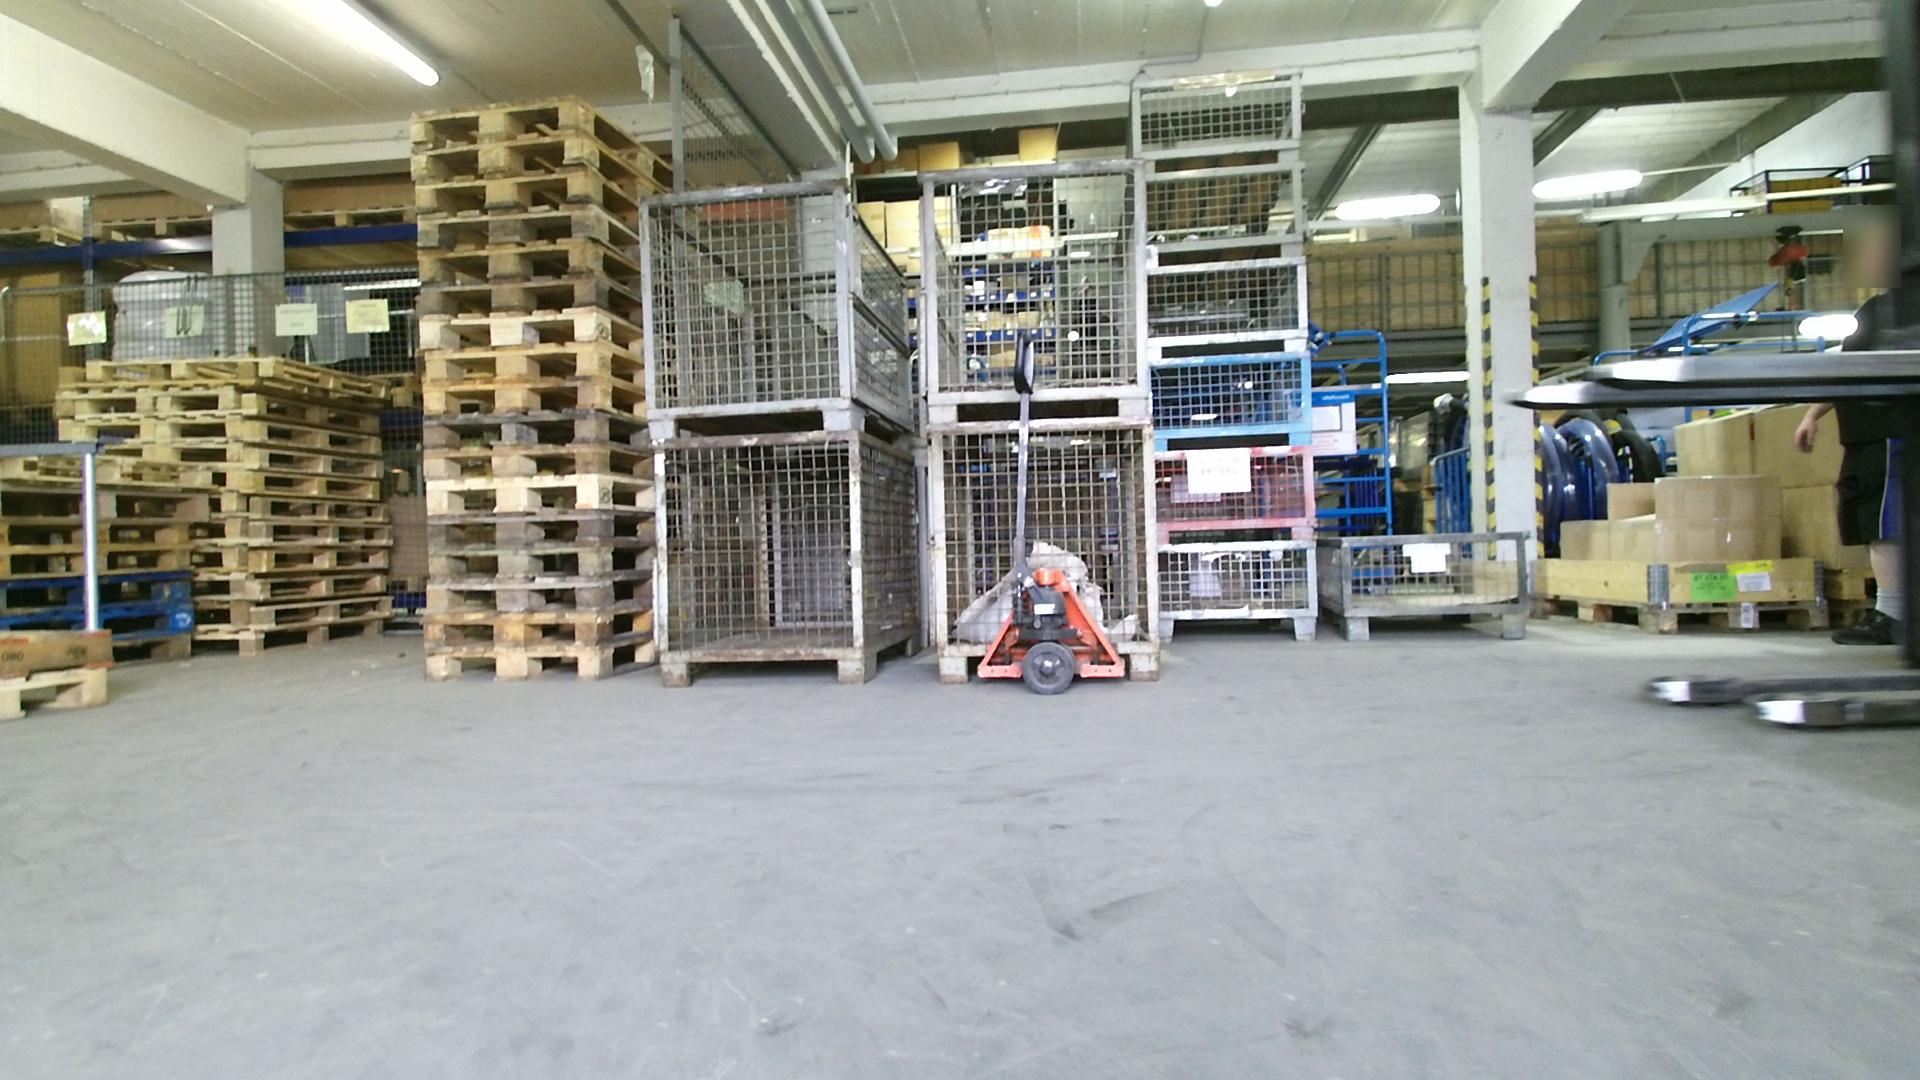

In [ ]:
Image(filename=f"{YOLO}/loco/images/val/509189,8734.jpg", width=640)    # or maybe width=640???

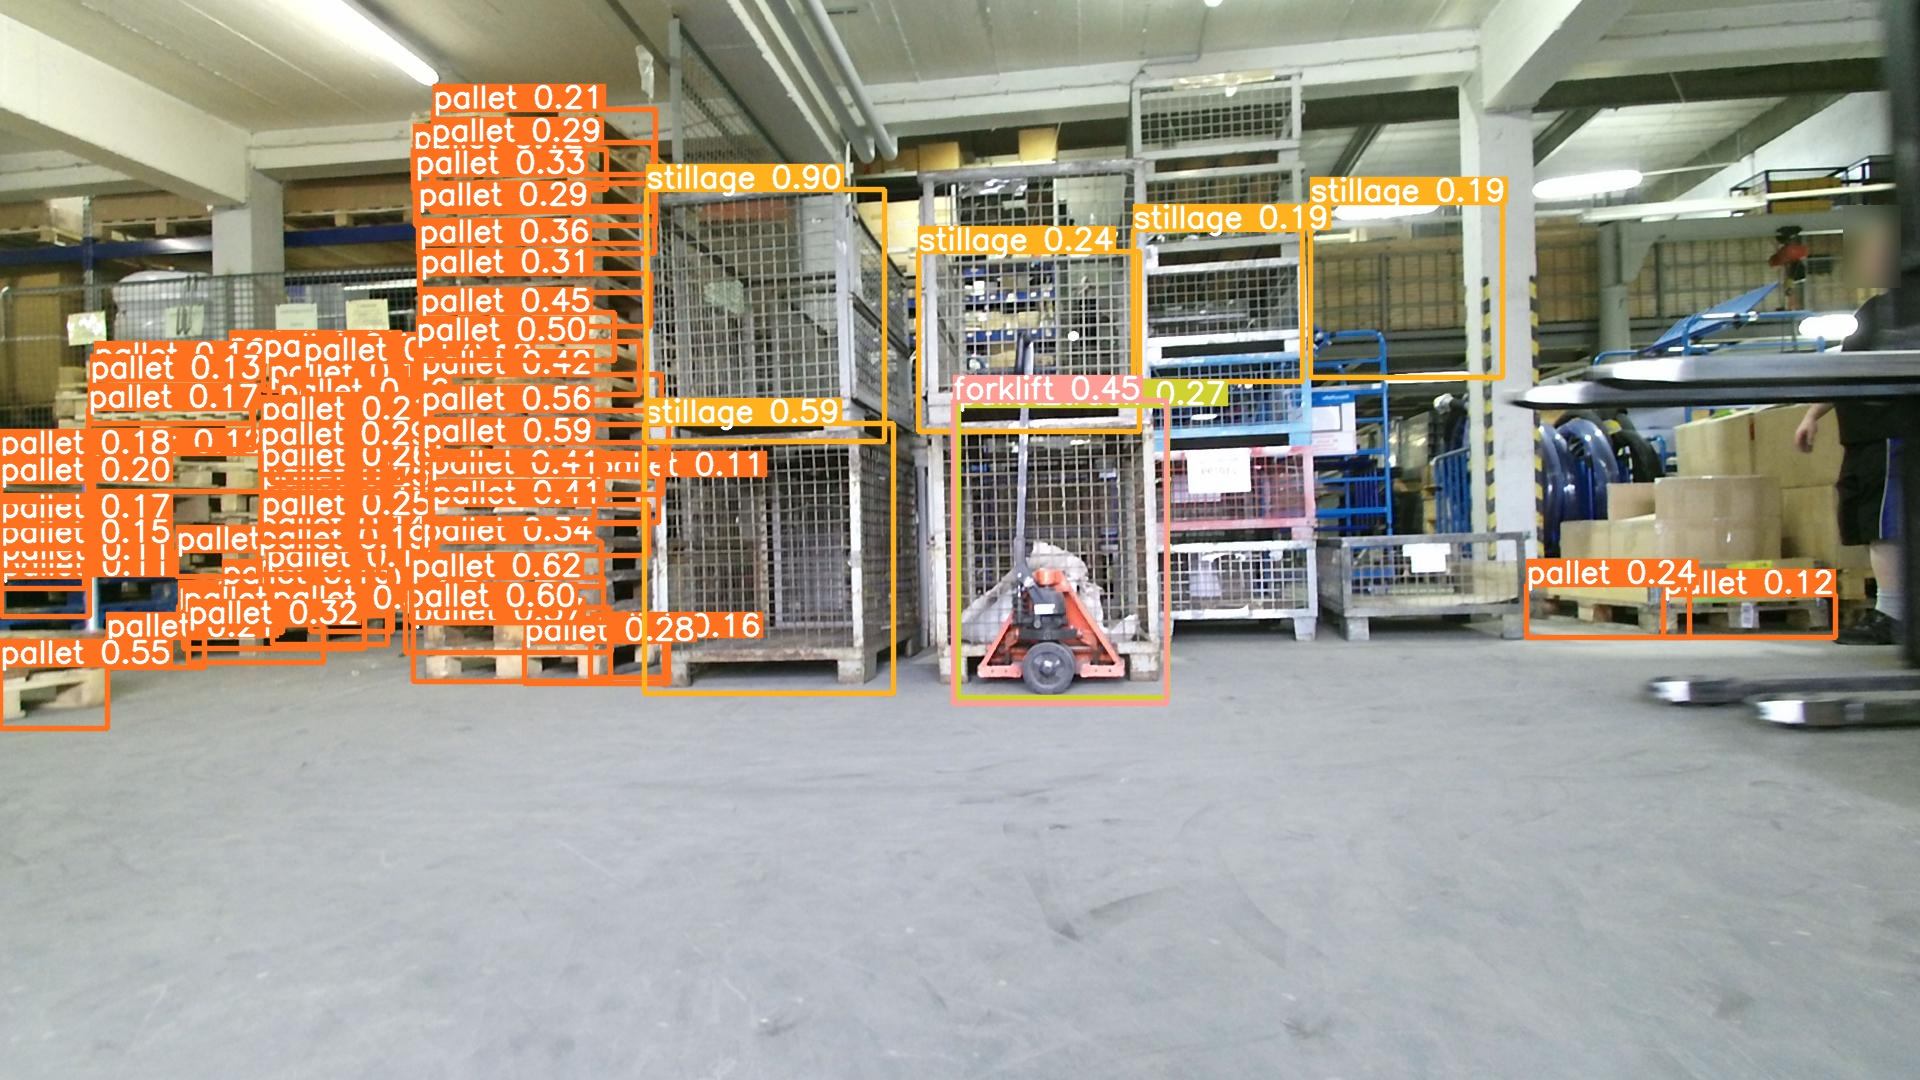

In [ ]:
Image(filename=f"{YOLO}/runs/detect/exp/509189,8734.jpg", width=640)    # or maybe width=640???

## Saving the obtained weights to Drive

In [ ]:
!cp -r {YOLO}/runs/ {HOME}/drive/MyDrive/Studium/'Bachelor Arbeit'/runs/{Lauf_num}

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

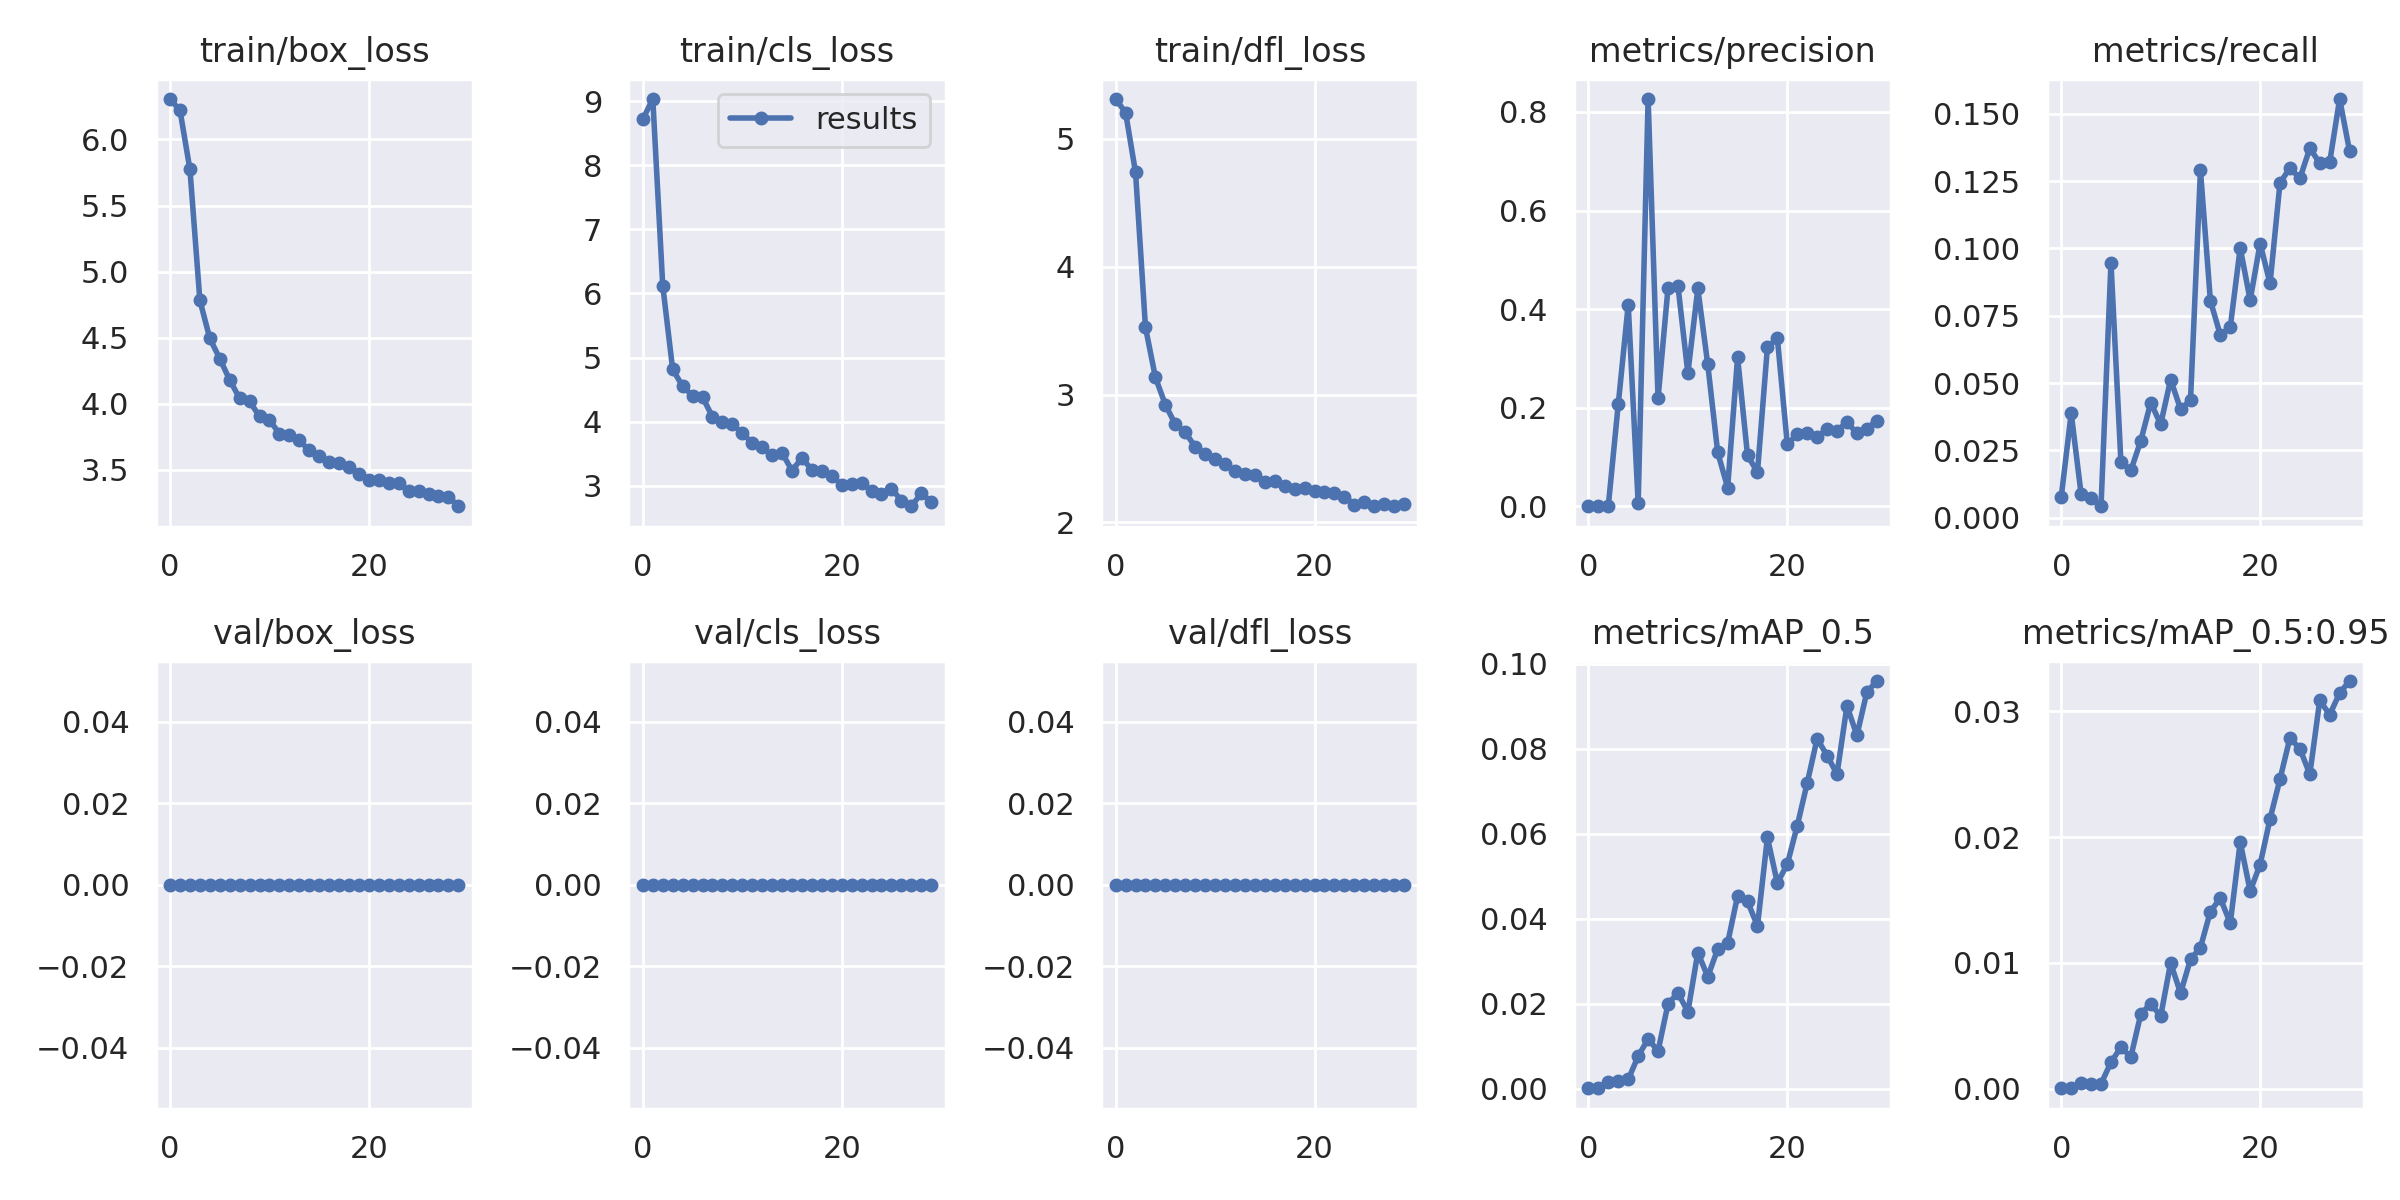

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

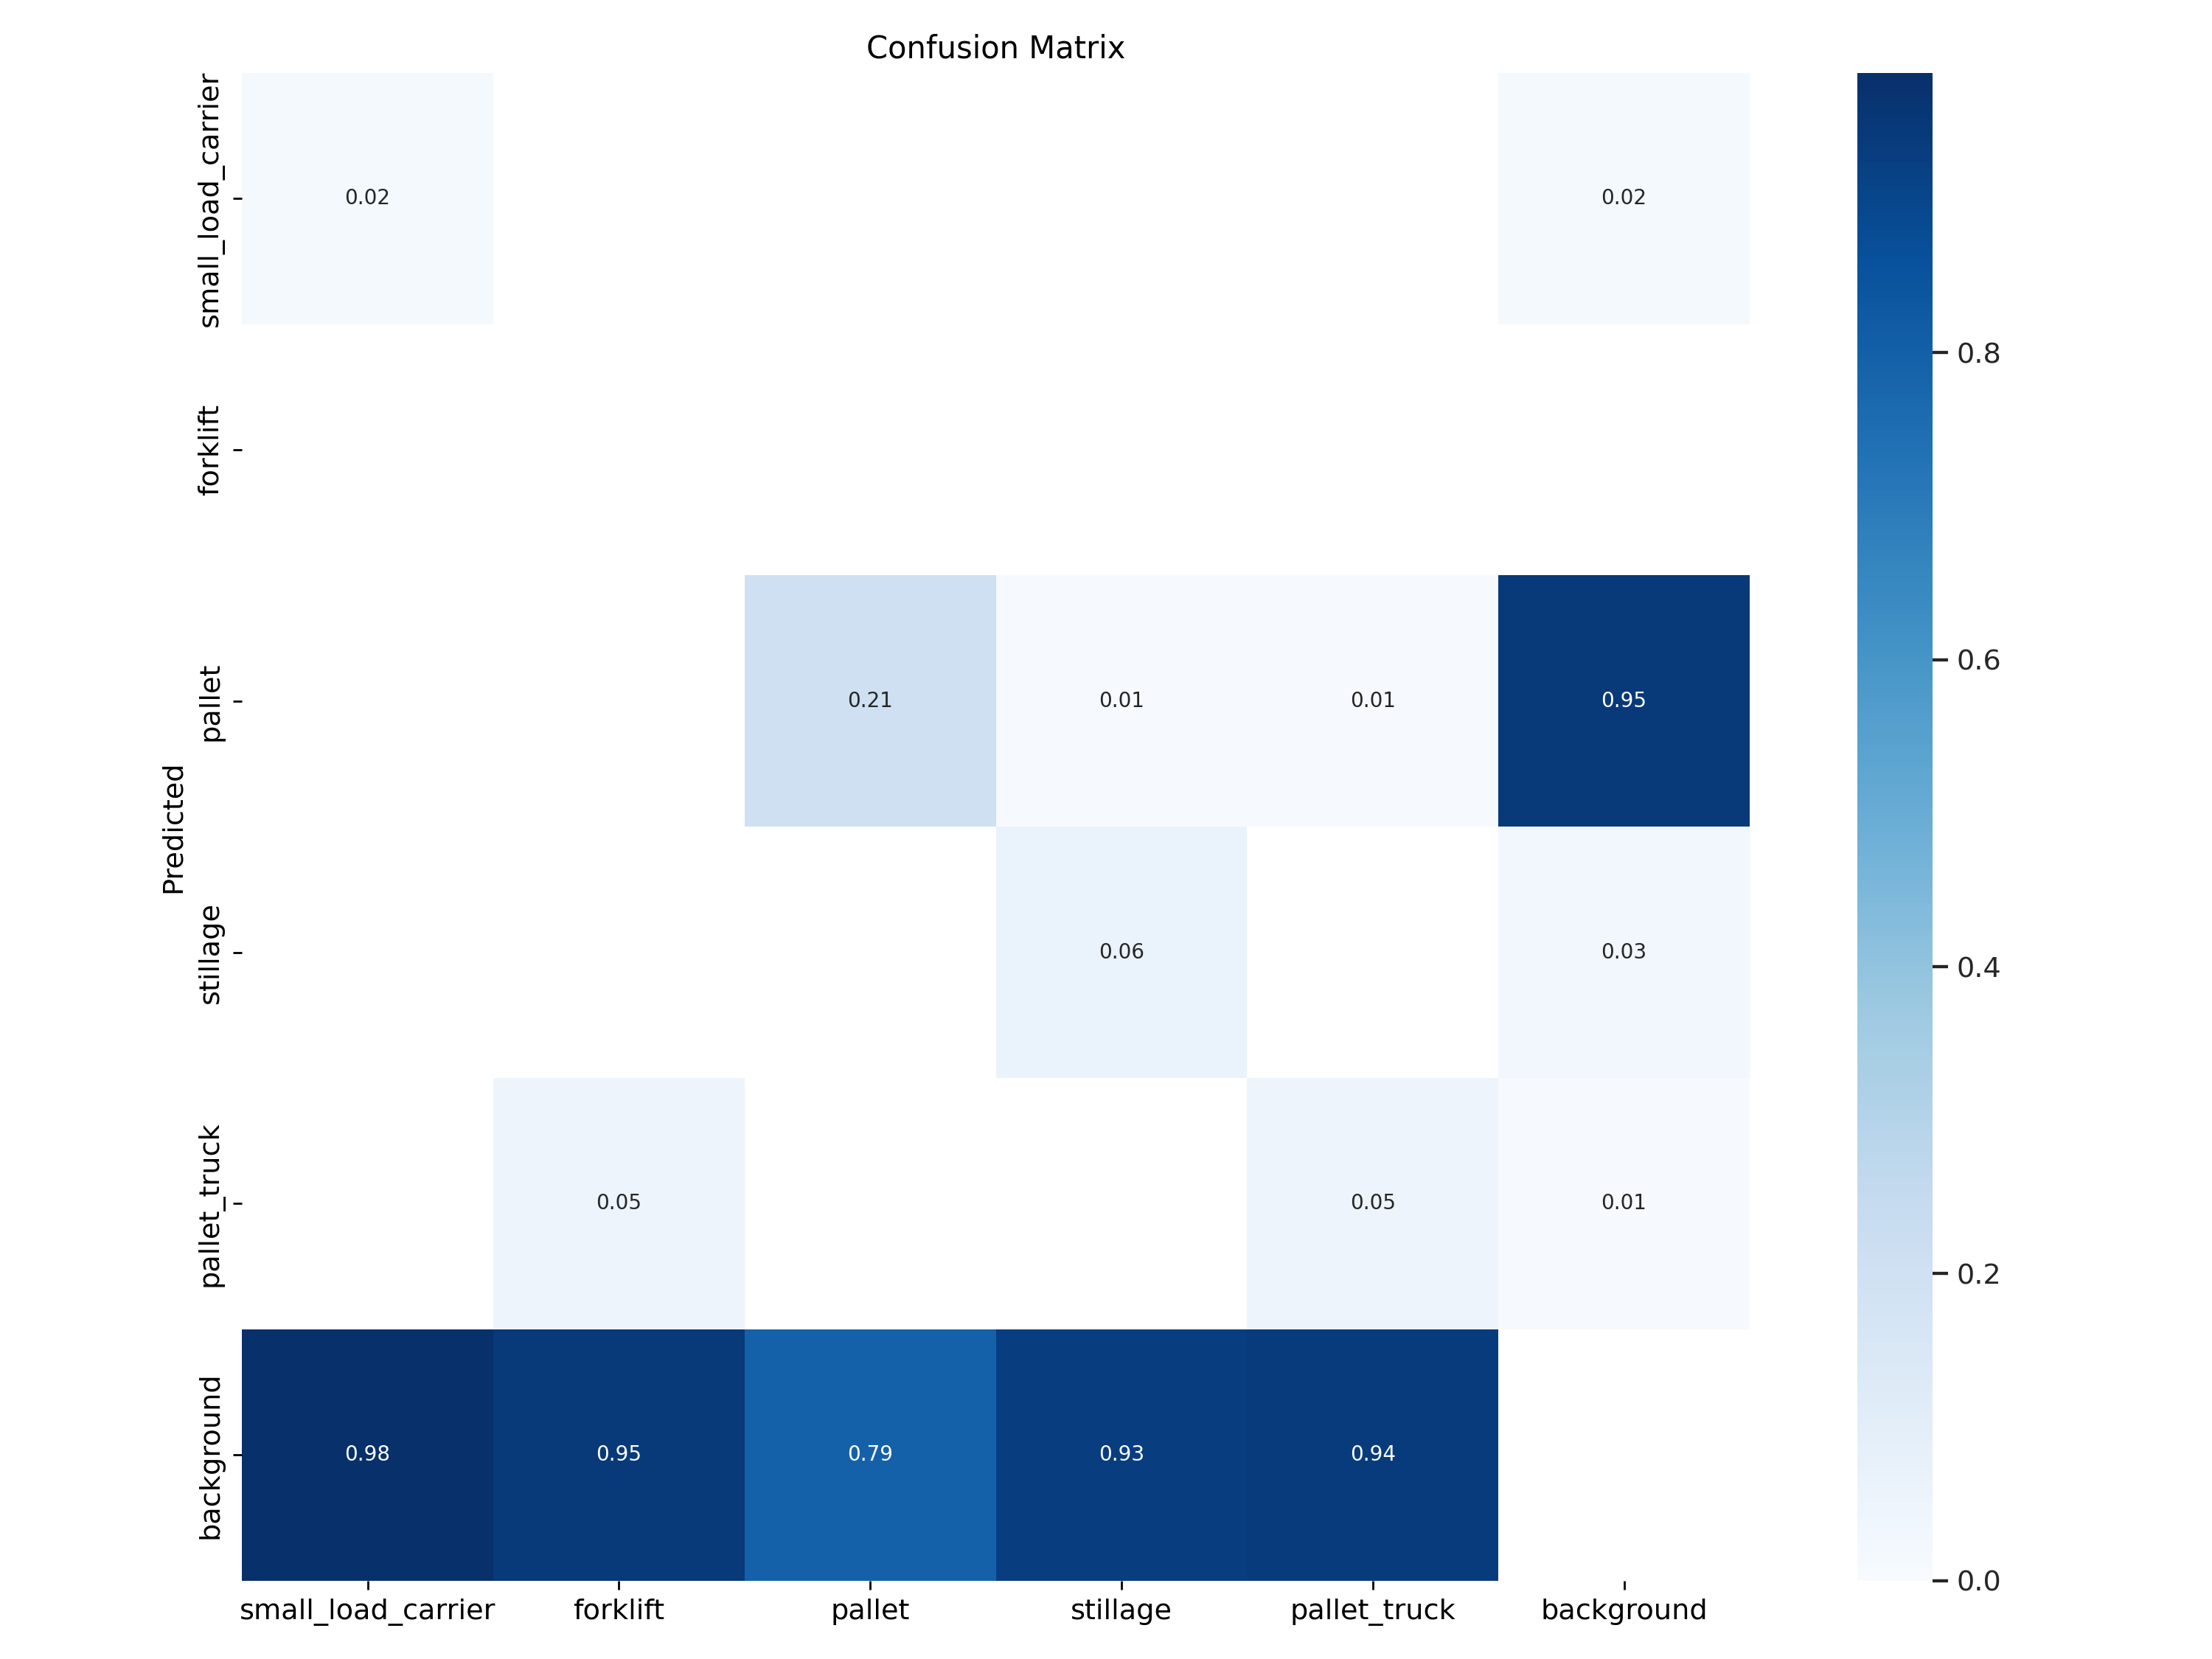

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

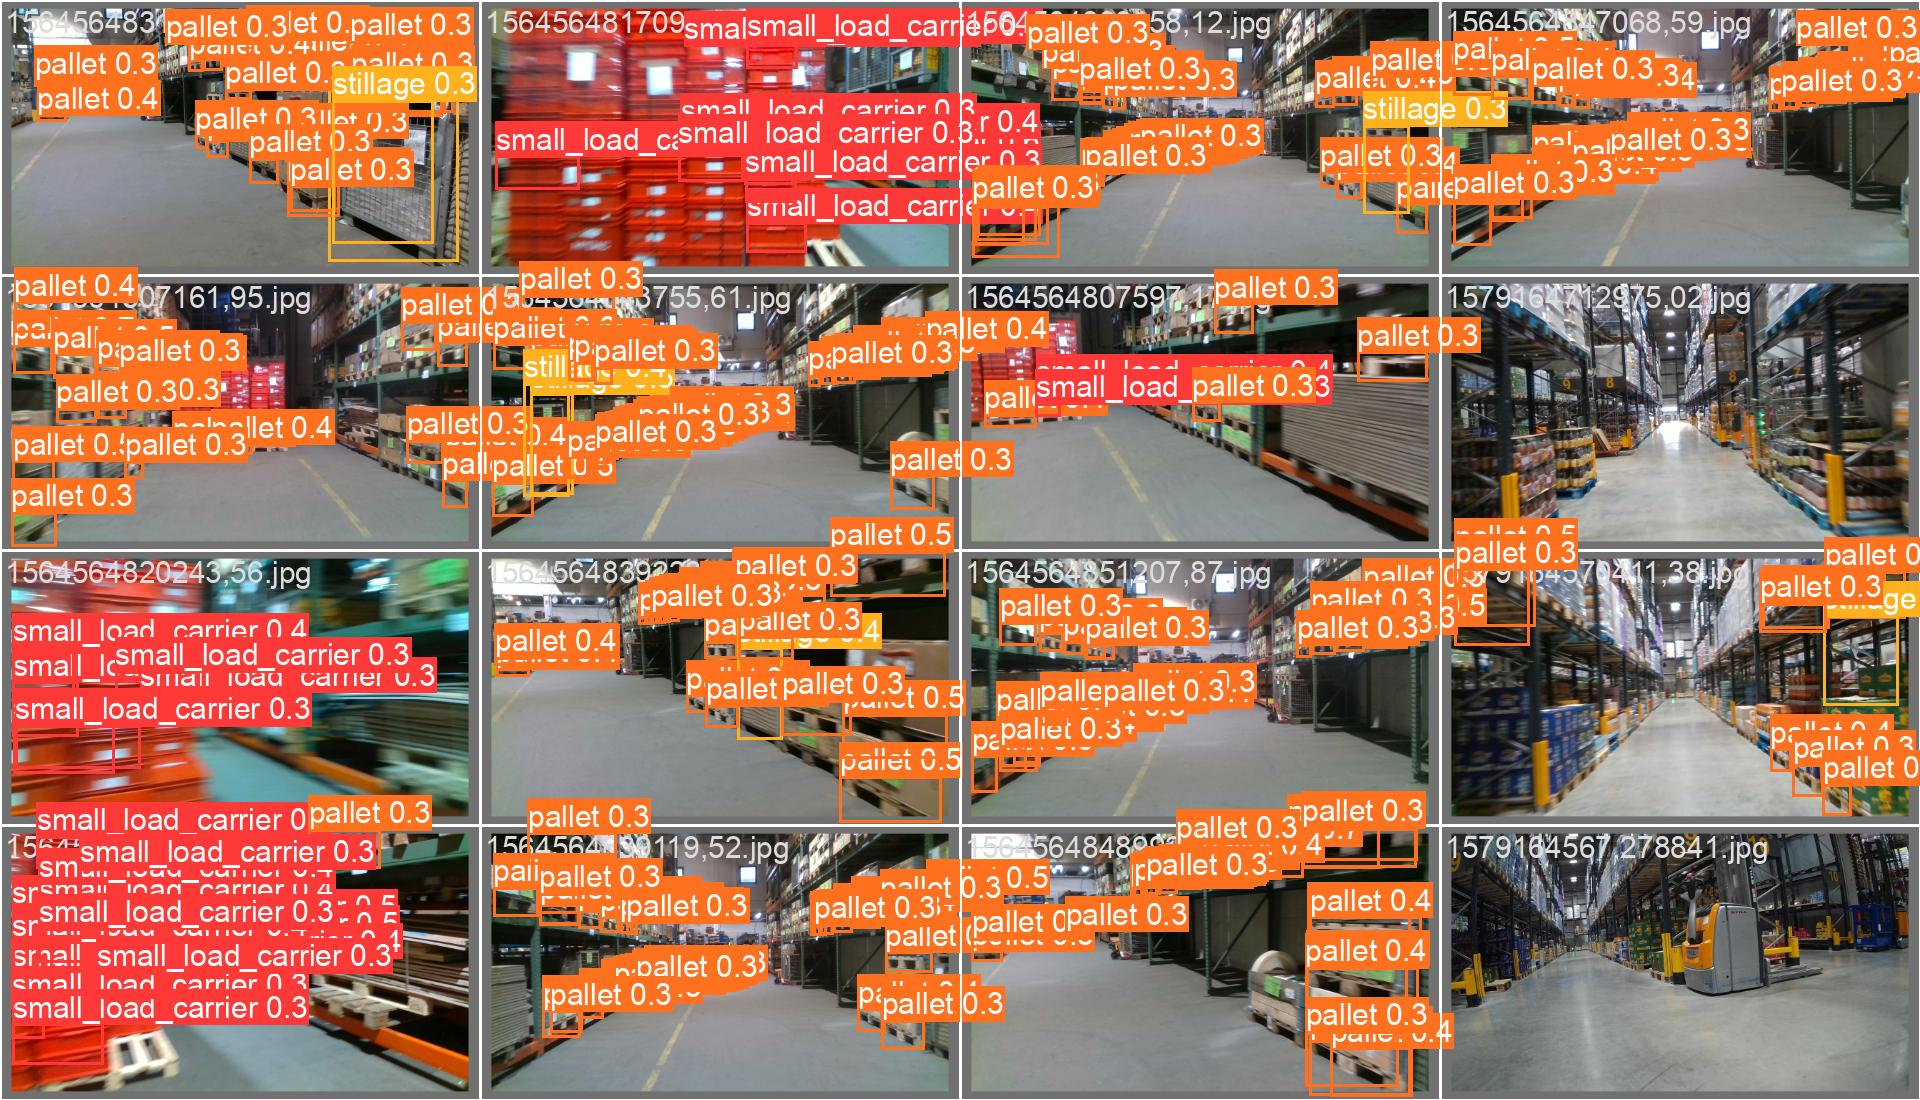

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

**NOTE**: Look into this! Why do you need validation?

In [ ]:
%cd {HOME}/yolov9

!python val_dual.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {YOLO}/loco.yaml \
--weights {YOLO}/runs/train/exp2/weights/best.pt

/content/yolov9
val_dual: data=/content/yolov9/loco.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-110-g098ff64 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9_custom summary: 580 layers, 60505150 parameters, 0 gradients, 263.9 GFLOPs
val: Scanning /content/yolov9/loco/labels/val.cache... 741 images, 1630 backgrounds, 0 corrupt: 100% 2371/2371 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.